In [130]:
import numpy as np

P0=np.array([1,0]) 
Root=np.array([n for n in range(1,6)])

for r in Root:
    P1= -r * P0
    P0=np.append(P0,0)
    P1=np.insert(P1,0,0)
    P0=P1+P0

P2=P0[:-1]
print(P0)

[   1  -15   85 -225  274 -120    0]


**Problema:** Dado P0 el vector de coeficientes del polinomio, definir una función que permita evaluar el polinomio para un x dado

In [131]:
def eval_pl(P0, x):
    valor=0
    n=len(P0)-1
    for i in range(len(P0)):
        valor += P0[i]*(x**(n-i))
    return valor

print(eval_pl(P2, 2.5))


-1.40625


P1: multiplicacion sintética

P2: Evaluar el polinomio

P3: Calcular los polinomios de Lagrange (Filter)

P4: Calcular el polinomio interpolador

P5: Aplicar a un contexto real

### Interpolación

función que pase por una serie de puntos,
un polinomio de grado n evaluado en cada xi = yi

* Condición $P_{5}(x_{i})=y_{i}

### Polinomios de Lagrange

$$L_{k} =\frac{(x-x_{1})(x-x_{2})\cdots (x-x_{k-1})\cdots(x-x_{k+1})\cdots(x-x_{n})}{(x_{k}-x_{1})(x_{k}-x_{2})\cdots (x_{k}-x_{k-1})(x-x_{k+1})(x-x_{n})}$$

**Ejemplo:**

$$L_{3}=\frac{(x-x_{1})(x-x_{2})(x-x_{4})(x-x_{5})}{(x_{3}-x_{1})(x_{3}-x_{2})(x_{3}-x_{4})(x_3 - x_5)}$$

Numerador: Polinomio
Denumerador: Número

En total aparecen n polinomio de Lagrange


### Multiplicación Sintética

input root[x1,x2,x3,x4,x5]

**Tarea 1:** Escribir el código que utilice multipliación sintética para calcular los n polinomios de Lagrange

**Ejemplo:** $P_{4}(x)=y_{1}L_{1}+y_{2}L_{2}+\cdots+y_{5}L_{5}$

Todo son polinomios de grado 4, los $y_{i}$ son números que multiplican al polinomio y $L_{i}$ son polinomios. 

In [132]:
import numpy as np
import matplotlib.pyplot as plt

def lagrange(x, xk, y):
    x = len(x)
    result = 0.0
    for i in range(0,x):
        term = xk[i]
        for j in range(0,x):
            if i != j:
                term = term*(x-xk[j])/(xk[i]-xk[j])
                result = result + term*y[i]
    return result

P0=np.array([1,0]) 
Root=np.array([n for n in range(1,6)])

for r in Root:
    P1= -r * P0
    P0=np.append(P0,0)
    P1=np.insert(P1,0,0)
    P0=P1+P0

P2=P0[:-1]
print(P0)


[   1  -15   85 -225  274 -120    0]


In [133]:
import numpy as np

def construir_M(nodos):
    """Construye el polinomio M(x) = producto de (x - xi) usando multiplicación sintética"""
    M = [1.0]  # Polinomio inicial: 1
    for xi in nodos:
        P1 = [-xi * c for c in M]  # Término constante (-xi * M)
        xM = M + [0.0]             # Multiplicar M por x (desplazamiento)
        P1_padded = [0.0] + P1     # Alinear términos para la suma
        M = [a + b for a, b in zip(xM, P1_padded)]  # Sumar: x*M + (-xi*M)
    return M

def division_sintetica(dividendo, c):
    """Divide un polinomio por (x - c) usando división sintética"""
    cociente = []
    resto = 0
    for coef in dividendo:
        temp = coef + resto
        cociente.append(temp)
        resto = temp * c
    return cociente[:-1], cociente[-1]

def evaluar_polinomio(coefs, x):
    """Evalúa un polinomio en x usando coeficientes en orden descendente"""
    return sum(coef * x**(len(coefs)-1-i) for i, coef in enumerate(coefs))

def polinomios_lagrange(nodos):
    n = len(nodos)
    if n == 0:
        return []
    
    M = construir_M(nodos)  # Construir M(x)
    polinomios = []
    
    for xi in nodos:
        # Dividir M(x) por (x - xi) para obtener N_i(x)
        cociente, resto = division_sintetica(M, xi)
        assert abs(resto) < 1e-10, f"Error: {xi} no es raíz de M(x)"
        
        # Calcular denominador D_i = N_i(xi)
        D_i = evaluar_polinomio(cociente, xi)
        
        # Normalizar para obtener L_i(x)
        L_i = [c / D_i for c in cociente]
        polinomios.append(L_i)
    
    return polinomios

# Ejemplo de uso
nodos = [1, 2, 3, 4, 5]
polinomios = polinomios_lagrange(nodos)

for i, pol in enumerate(polinomios):
    print(f"L_{i+1}(x) = {pol}")

L_1(x) = [0.041666666666666664, -0.5833333333333334, 2.9583333333333335, -6.416666666666667, 5.0]
L_2(x) = [-0.16666666666666666, 2.1666666666666665, -9.833333333333334, 17.833333333333332, -10.0]
L_3(x) = [0.25, -3.0, 12.25, -19.5, 10.0]
L_4(x) = [-0.16666666666666666, 1.8333333333333333, -6.833333333333333, 10.166666666666666, -5.0]
L_5(x) = [0.041666666666666664, -0.4166666666666667, 1.4583333333333333, -2.0833333333333335, 1.0]


## Método de Neville

Cuando usamos los polinomios de Lagrange, tenemos una cantidad de nodos, estos nodos pueden ser $(x_{0},y_{0}),(x_{1},y_{1}),\cdots,(x_{n}, y_{n})$, con lagrange calculamos el polinomio interpolador, para ello se debe calcularar cada polinomio asociado a cada nodo, como ejemplo tenemos los siguientes nodos:

$$(1,2),(2,3),(3,5),(4,7),(5,11) y (6,13)$$

con ello vamos a calcular los polinomios $P_{0,1}(x)=y_{0}\cdot L_{1,0}(x)+y_{1}\cdot L_{1,1}(x)$

Entonces para:

* $L_{1,0}$ con los nodos $n0=(1,2), n1=(2,3)$

$$L_{1,0}(x)=\frac{(x-2)}{1-2}=-(x-2)$$

* $L_{1,1}$

$$L_{1,1}=\frac{x-1}{(2-1)}=x-1$$

Luego tenemos:

$$P_{0,1}(x)=y_{0}\cdot$$

<function matplotlib.pyplot.show(close=None, block=None)>

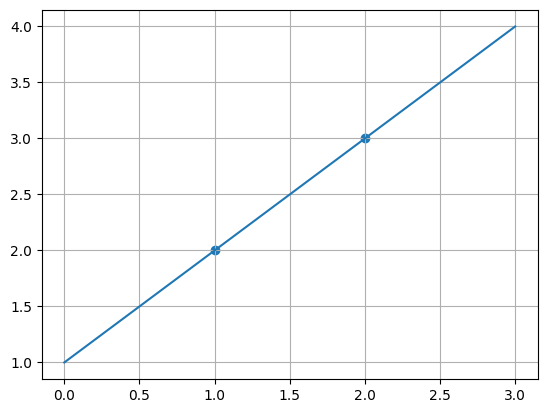

In [134]:
import numpy as np
import matplotlib.pyplot as plt

#definir un dominio
x=np.linspace(0,3,4)
x_nodos=np.array([1,2])

def P(x):
    return x+1

y= P(x)
y_nodos=P(x_nodos)


#graficar
plt.plot(x,y)
plt.scatter(x_nodos,y_nodos)
plt.grid(True)
plt.show


$P_{0,1,2}(x)=(1,2)(2,3)(2,5)$

$P_{3}(x)=y_{0}L_{2,0}(x)+y_{1}L_{2,1}(x)+y_{2}L_{2,2}(x)=\sum_{i=0}^{2}y_i L_{2,i}(x)$

$L_{2,0}(x)=\frac{(x-2)(x-3)}{(1-2)(1-3)}=\frac{x^2}{2}-\frac{5x}{2}+3$


In [135]:
import sympy as sp

x=sp.symbols('x')

#definir L_{2,0}
L_0=((x-2)*(x-3))/((1-2)*(1-3))
print(sp.expand(L_0))

x**2/2 - 5*x/2 + 3


$L_{2,1}(x)=\frac{(x-1)(x-3)}{(2-1)(2-3)}=-x^2 + 4x-3$

In [136]:
#definir L_{2,1}
L_1=((x-1)*(x-3))/((2-1)*(2-3))
print(sp.expand(L_1))

-x**2 + 4*x - 3


$L_{2,2}(x)=\frac{(x-1)(x-2)}{(3-1)(3-2)}=\frac{x^2}{2}-\frac{3x}{2}+1$

In [137]:
#definir L_{2,2}
L_2=((x-1)*(x-2))/((3-1)*(3-2))
print(sp.expand(L_2))

x**2/2 - 3*x/2 + 1


$P_{3}(x)=2 \left( \frac{x^2}{2}-\frac{5x}{2}+3 \right)+3 \left(-x^2+4x-3 \right) + 5 \left( \frac{x^2}{2}- \frac{3x}{2}+1 \right)=\frac{x^2}{2}-\frac{x}{2}+2$

In [138]:
P_3=2*L_0+3*L_1+5*L_2
print(P_3)

(x - 3)*(x - 2) - 3*(x - 3)*(x - 1) + 5*(x - 2)*(x - 1)/2


<function matplotlib.pyplot.show(close=None, block=None)>

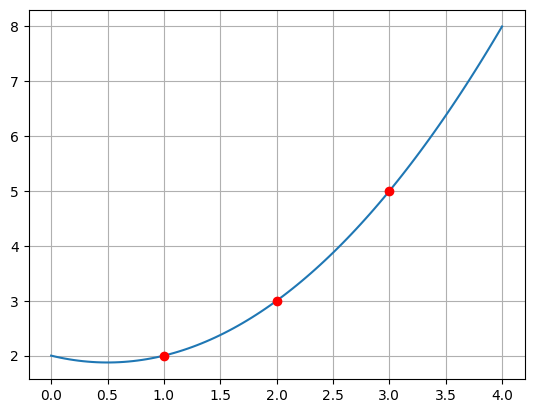

In [139]:
#definir el polinomio
P_3_expand=sp.expand(P_3)
P_3_func=sp.lambdify(x,P_3_expand,'numpy')

x_vals=np.linspace(0,4,100)
y_vals=P_3_func(x_vals)

x_nodos=np.array([1,2,3,])
y_nodos=P_3_func(x_nodos)

plt.plot(x_vals,y_vals)
plt.scatter(x_nodos, y_nodos, c='r', zorder=3)
plt.grid(True)
plt.show


### Justificación

Para usar el método de Neville

Supongamos que tenemos calculados los polinomios $P_{0}$ y $P_{1}$ y queremos agregar un nuevo nodo $(x_{1},y_{1})$

$P_{0,1}(x)=\frac{(x-x_{0})P_{1}-(x-x_{1})P_{0}}{x_{1}-x_{0}}$

de forma general 

    n=i        n=j
$(x_{i},y_{i}), \quad (x_{j},y_{j})$

![Imagen de WhatsApp 2025-03-19 a las 17.14.16_8e5dd6d9.jpg](<attachment:Imagen de WhatsApp 2025-03-19 a las 17.14.16_8e5dd6d9.jpg>)
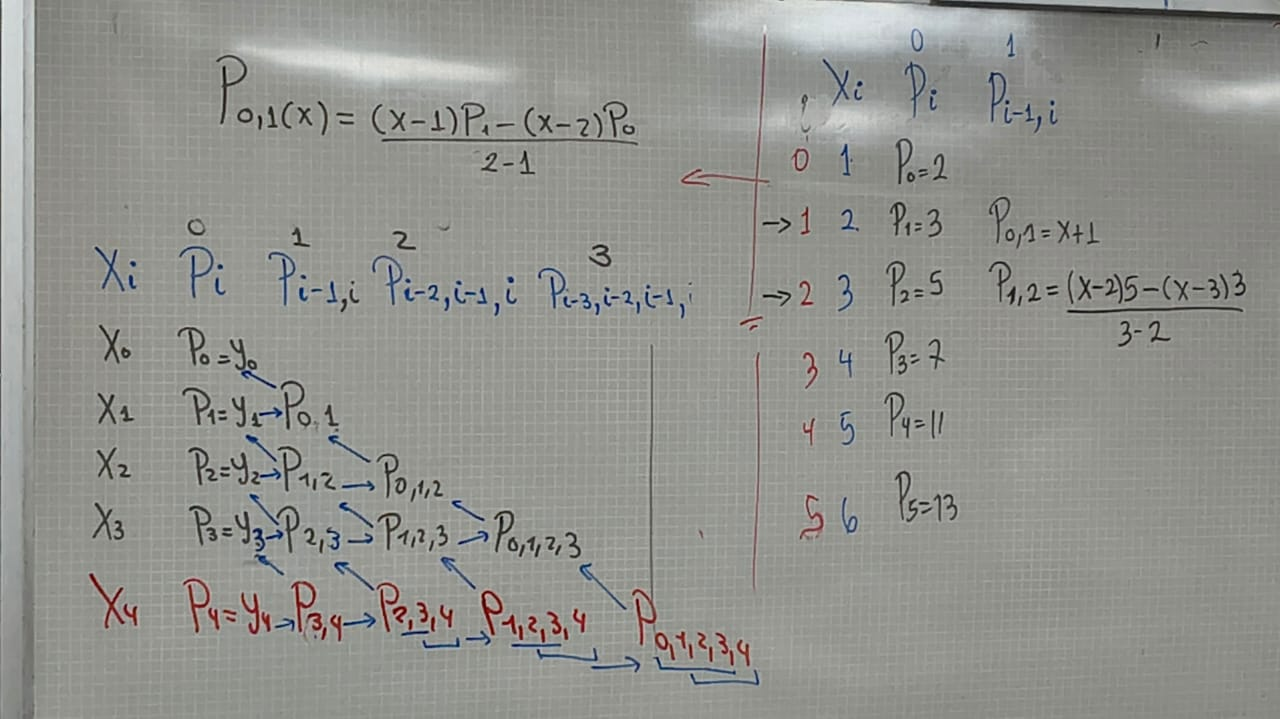

In [140]:
# Vamos a calcular el polinomio interpolador por niveles
P_0=2
P_1=3
P_2=5
P_3=7
P_4=11
P_5=13

x_0=1
x_1=2
x_2=3
x_3=4
x_4=5
x_5=6


P_0_1=(1/(x_1-x_0))*((x-x_0)*P_1-(x-x_1)*P_0)

P_1_2=(1/(x_2-x_1))*((x-x_1)*P_2-(x-x_2)*P_1)

P_2_3=(1/(x_3-x_2))*((x-x_2)*P_3-(x-x_3)*P_2)

P_3_4=(1/(x_4-x_3))*((x-x_3)*P_4-(x-x_4)*P_3)

P_4_5=(1/(x_5-x_4))*((x-x_4)*P_5-(x-x_5)*P_4)

print(sp.expand(P_0_1))
print(sp.expand(P_1_2))
print(sp.expand(P_2_3))
print(sp.expand(P_3_4))
print(sp.expand(P_4_5))


1.0*x + 1.0
2.0*x - 1.0
2.0*x - 1.0
4.0*x - 9.0
2.0*x + 1.0


In [145]:
P=np.array([2,3,5,7,11,13])

xn=np.array([1,2,3,4,5,6])

for i in range(6):
    for j in range(6):
        if i != j and j-i==1:
            salida="(x-x_"+str(j)+")P_"+str(i)+"-(x-x_"+str(i)+")P_"+str(i)
            #print(salida)
            Q = (1/(xn[j]-xn[i])) * ((x-xn[i])*P[j] - (x-xn[j])*P[i])
            print(sp.expand(Q))  # Expandir la expresión simbólica
    

1.0*x + 1.0
2.0*x - 1.0
2.0*x - 1.0
4.0*x - 9.0
2.0*x + 1.0
